In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/upload_3e0830df-be08-46da-ad85-3ba51c754af0.csv")
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
def preprocess_music_dataset(df):
    df['track_name'] = df['track_name'].fillna("Unknown")
    df['track_artist'] = df['track_artist'].fillna("Unknown")
    df['track_album_name'] = df['track_album_name'].fillna("Unknown")
    df['playlist_genre'] = df['playlist_genre'].fillna("Unknown")
    df['playlist_subgenre'] = df['playlist_subgenre'].fillna("Unknown")
    def extract_year(x):
        try:
            return int(str(x).split("-")[0])
        except:
            return np.nan
    df['release_year'] = df['track_album_release_date'].apply(extract_year)
    df['release_year'] = df['release_year'].fillna(int(df['release_year'].median()))

    df = df.drop_duplicates(subset=['track_name', 'track_artist'])

    numeric_features = [
        'danceability','energy','key','loudness','mode',
        'speechiness','acousticness','instrumentalness',
        'liveness','valence','tempo','duration_ms'
    ]
    numeric_features = [f for f in numeric_features if f in df.columns]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[numeric_features])

    print("Preprocessing Complete")
    print("Numeric Features Used:", numeric_features)
    print("Scaled Data Shape:", X_scaled.shape)

    return df, X_scaled, numeric_features

df_clean, X_scaled, features = preprocess_music_dataset(df)


print(df_clean.head())


Dataset Shape: (8795, 23)

Columns: ['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Preprocessing Complete
Numeric Features Used: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Scaled Data Shape: (7863, 12)
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu 

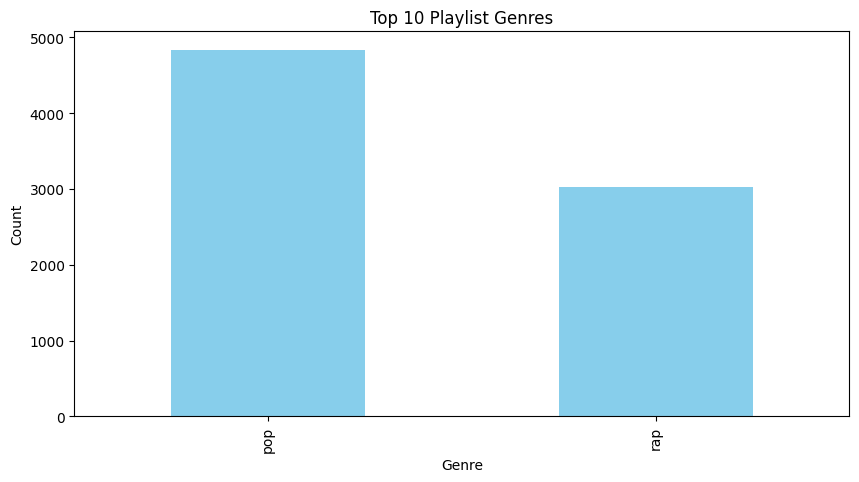

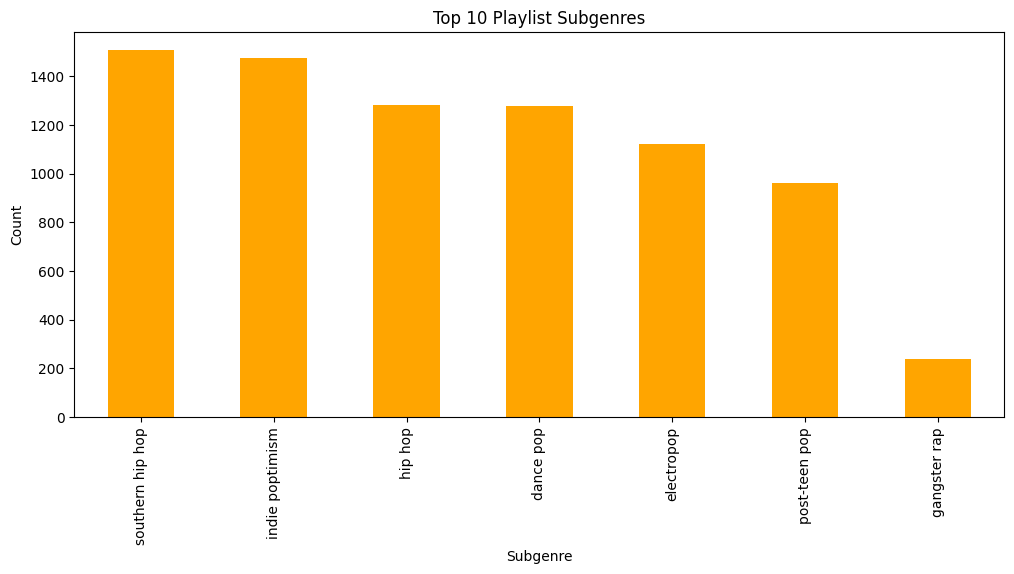

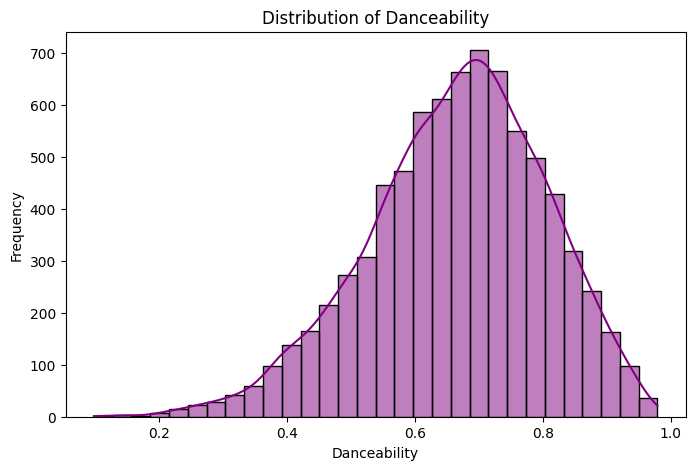

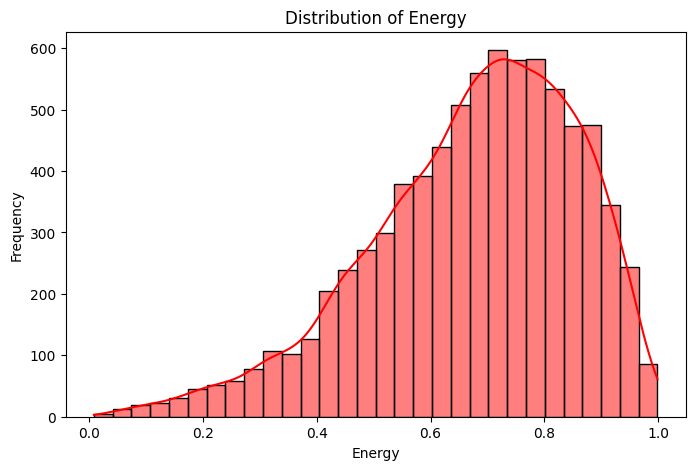

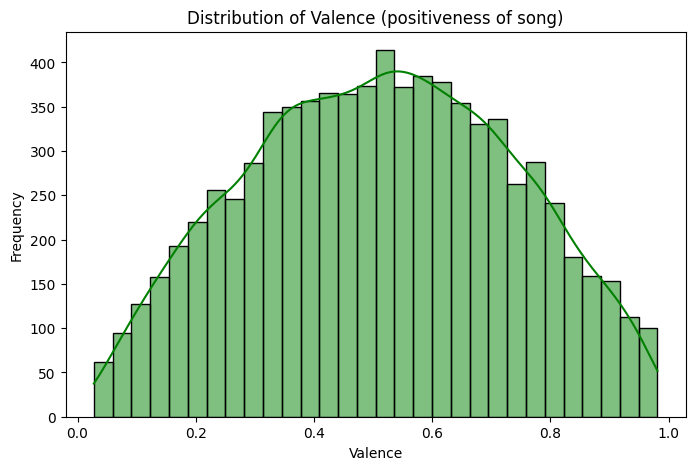

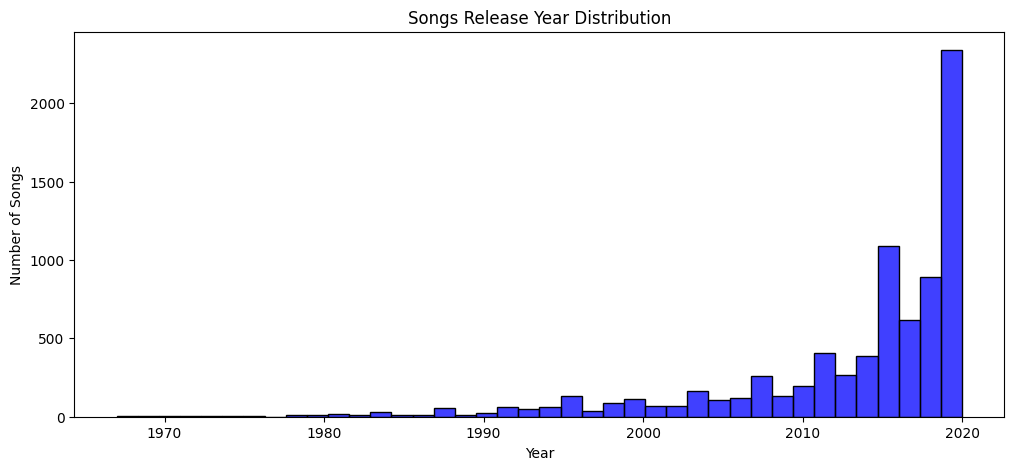

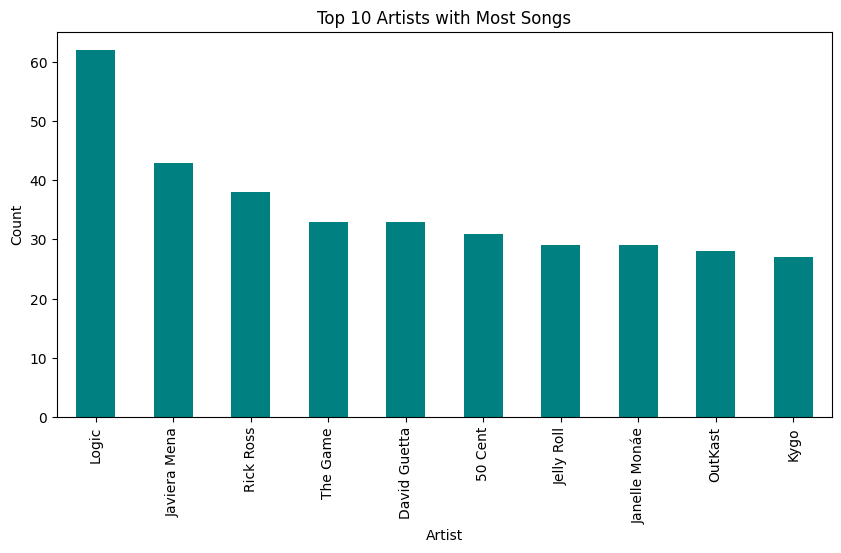

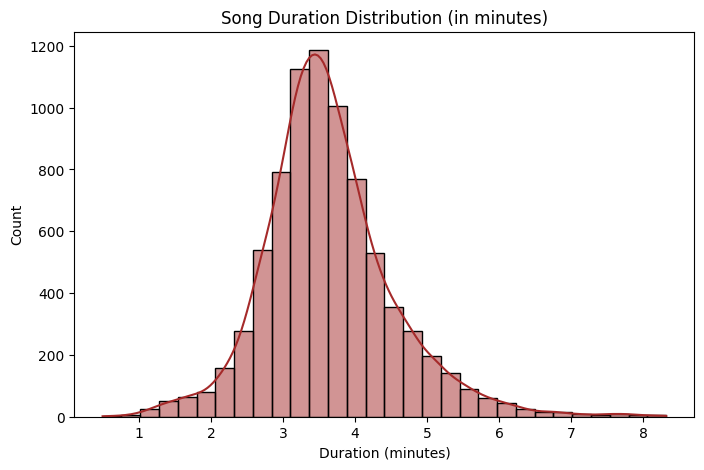

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
df_clean['playlist_genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Playlist Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,5))
df_clean['playlist_subgenre'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Playlist Subgenres")
plt.xlabel("Subgenre")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_clean['danceability'], bins=30, kde=True, color='purple')
plt.title("Distribution of Danceability")
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df_clean['energy'], bins=30, kde=True, color='red')
plt.title("Distribution of Energy")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_clean['valence'], bins=30, kde=True, color='green')
plt.title("Distribution of Valence (positiveness of song)")
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df_clean['release_year'], bins=40, kde=False, color='blue')
plt.title("Songs Release Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.show()

plt.figure(figsize=(10,5))
df_clean['track_artist'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Artists with Most Songs")
plt.xlabel("Artist")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_clean['duration_ms']/60000, bins=30, kde=True, color='brown')
plt.title("Song Duration Distribution (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


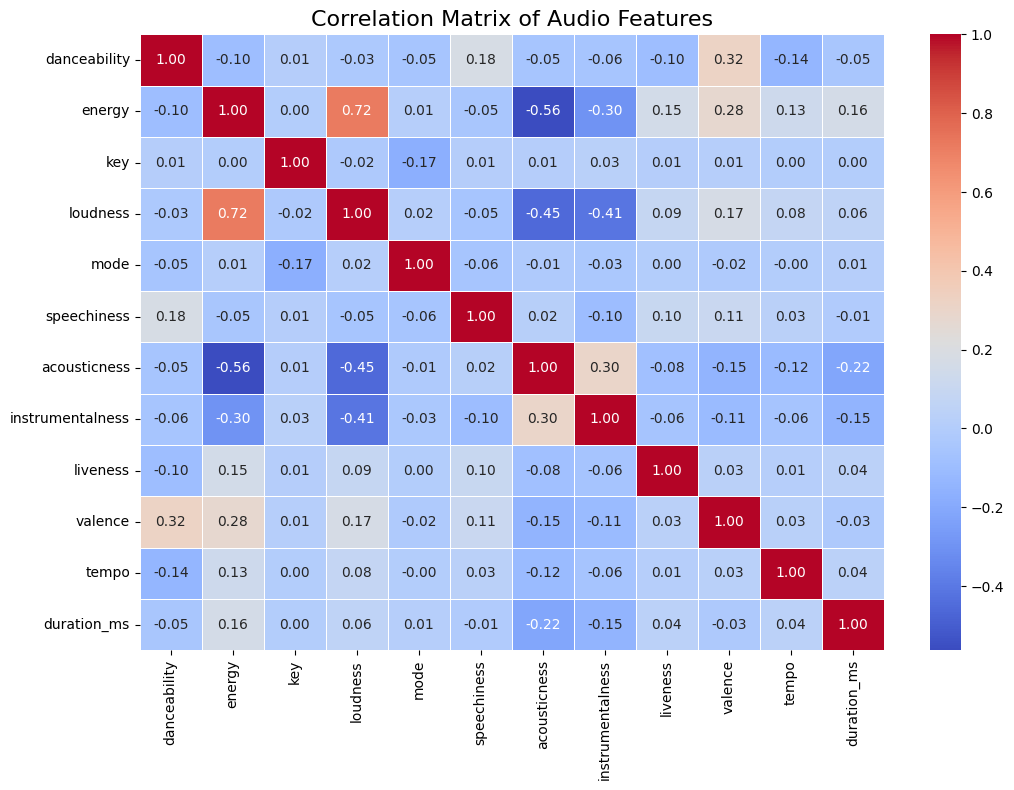

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df_clean[features]

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Audio Features", fontsize=16)
plt.show()


✅ Dataset loaded. Shape: (26174, 23)
✅ df_clean created. Shape: (26168, 23)
✅ Numerical features scaled. Shape: (26168, 13)
✅ Clustering done. Number of clusters: 5


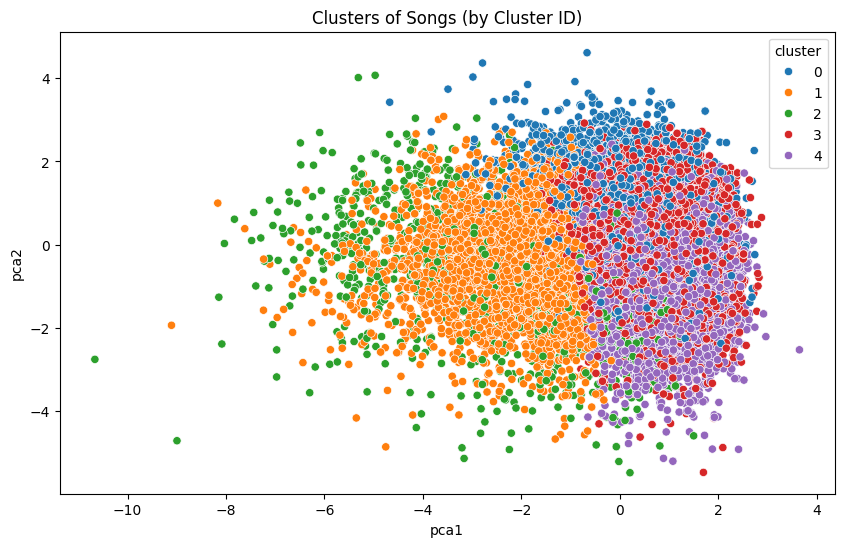

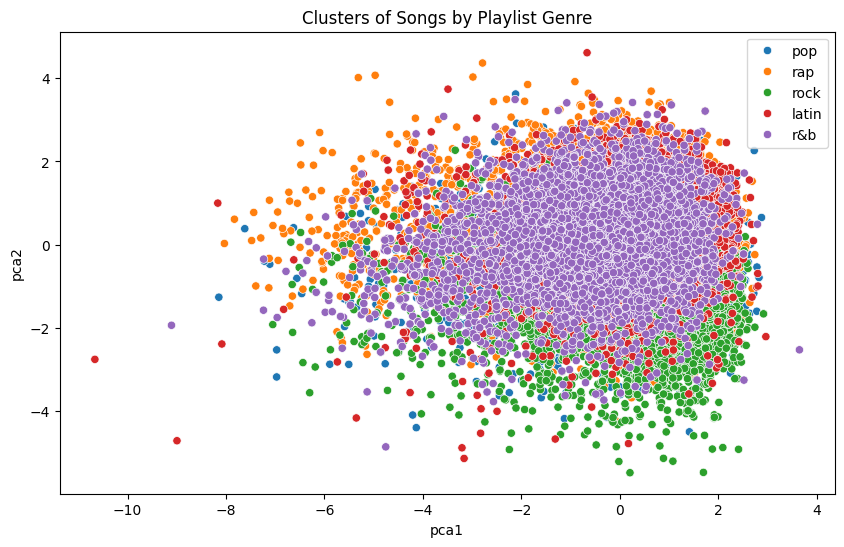

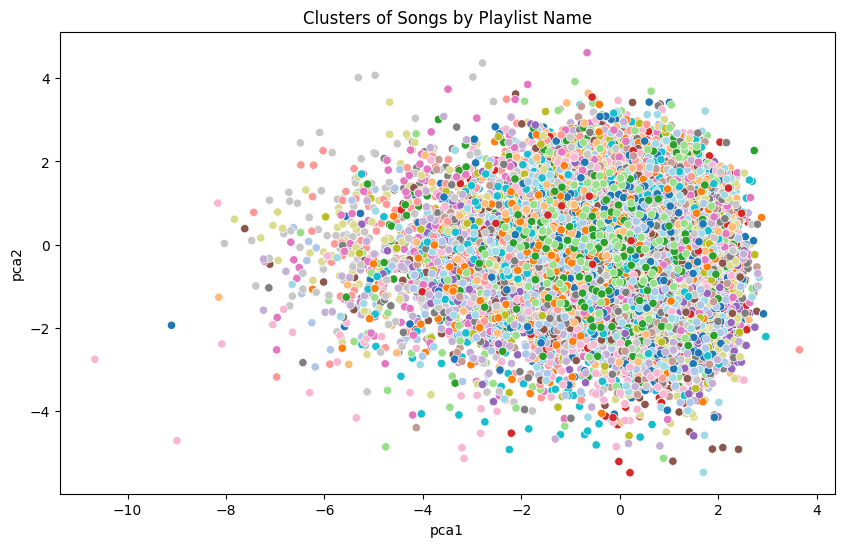

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/upload_3e0830df-be08-46da-ad85-3ba51c754af0.csv")

print("Dataset loaded. Shape:", df.shape)

df_clean = df.copy()

df_clean = df_clean.dropna()

print("df_clean created. Shape:", df_clean.shape)

numeric_features = df_clean.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_features])

print("Numerical features scaled. Shape:", X_scaled.shape)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering done. Number of clusters:", k)



pca = PCA(n_components=2, random_state=42)
df_clean[['pca1','pca2']] = pca.fit_transform(X_scaled)


plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_clean, palette='tab10')
plt.title("Clusters of Songs (by Cluster ID)")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='playlist_genre', data=df_clean, palette='tab10')
plt.title("Clusters of Songs by Playlist Genre")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='playlist_name', data=df_clean, palette='tab20', legend=False)
plt.title("Clusters of Songs by Playlist Name")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv("/content/upload_3e0830df-be08-46da-ad85-3ba51c754af0.csv")

df_clean = df.dropna().reset_index(drop=True)

print("Dataset Loaded. Shape:", df_clean.shape)

numeric_features = df_clean.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_features])

knn = NearestNeighbors(n_neighbors=6, metric="cosine")
knn.fit(X_scaled)

def recommend_songs(song_name, num_recommendations=5):
    if song_name not in df_clean['track_name'].values:
        return f"Song '{song_name}' not found in dataset."

    idx = df_clean[df_clean['track_name'] == song_name].index[0]
    distances, indices = knn.kneighbors([X_scaled[idx]], n_neighbors=num_recommendations+1)


    available_cols = [col for col in ['track_name', 'track_artist', 'artist_name', 'playlist_genre'] if col in df_clean.columns]

    recommendations = df_clean.iloc[indices[0][1:]][available_cols]
    return recommendations

song_input = df_clean['track_name'].iloc[3]
print(f"\nInput Song: {song_input}\n")
print("Recommended Songs:\n")
print(recommend_songs(song_input, num_recommendations=5))


Dataset Loaded. Shape: (32828, 23)

Input Song: Call You Mine - Keanu Silva Remix

Recommended Songs:

                                      track_name track_artist playlist_genre
29623  As Far as Feelings Go - Keanu Silva Remix  Alle Farben            edm
29979      Post Malone (feat. RANI) - VIZE Remix    Sam Feldt            edm
27252      Post Malone (feat. RANI) - VIZE Remix    Sam Feldt            edm
28342                         Bigroom Never Dies     Hardwell            edm
28693                                     Snatch  Bassjackers            edm
